In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
%matplotlib inline

In [2]:
def plot_images(images, grey):
    fig = plt.figure(figsize=(15,18))
    for i in range(min(16, len(images))):
        fig.add_subplot(4, 4, i+1)
        if grey:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i]) 
    plt.show() 

In [88]:
#shape = 0 - h
#shape = 1 - w
#axis = 0 - columns
#axis = 1 - rows
def img_crop(img, level_blank = 5, axis=0):
    mean_imgs = np.mean(img, axis=axis)
    plt.plot(mean_imgs)
    plt.show()
    index = np.where(mean_imgs <= level_blank)
    if axis == 0:
        hw = int(np.mean(np.where(mean_imgs[20:44] == np.max(mean_imgs[20:44])))) + 20
    else:
        hw = img.shape[0]*0.5
    print(img.shape)
    shape_img = img.shape[1]  if axis > 0 else img.shape[0]
    index = np.squeeze(index, -1)              
    sl = index[index > hw]
    print(hw, np.min(sl))
    l_top = np.min(sl) - 1 if len(sl) > 0 else shape_img
    l_top = l_top if l_top >= 0 else shape_img
    sl = index[index < hw]
    l_bot = np.max(sl) + 1 if len(sl) > 0 else 0
    l_bot = l_bot if l_bot >= 0 else 0
    w = img.shape[1] if axis > 0 else l_top - l_bot
    h = img.shape[0] if axis == 0 else l_top - l_bot
    if h < 0:
        h = img.shape[0]
    if w < 0:
        w = img.shape[1]
    imc = np.zeros((h, w))
    print(h, w)
    imc[:, :] = img[l_bot:l_top, :] if axis > 0 else img[:, l_bot:l_top]
    return np.uint8(imc)

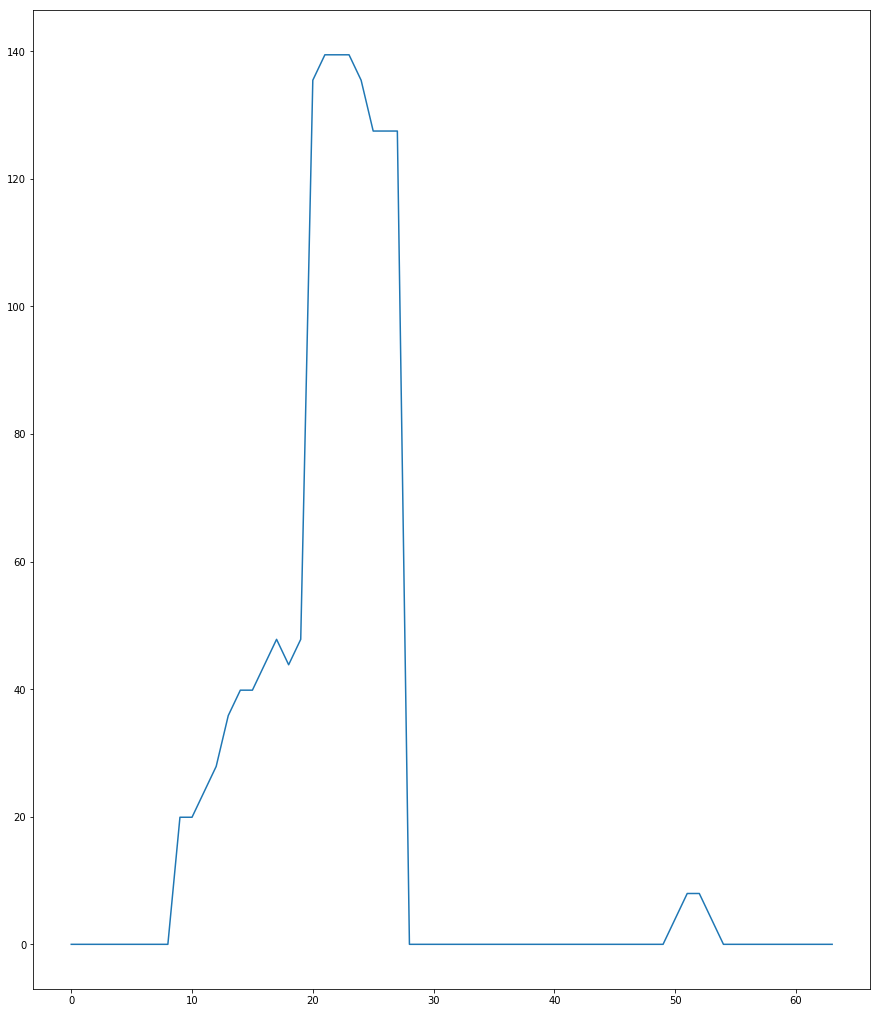

(64, 64)
22 28
64 18


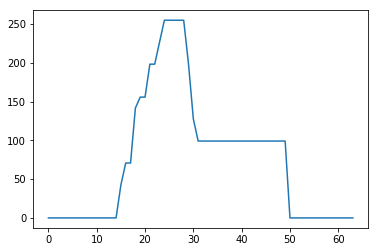

(64, 18)
32.0 50
34 18


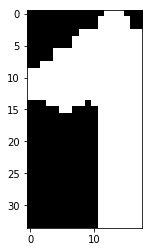

In [89]:
img=cv2.imread('/mnt/misk/misk/lplate/chars/1/ 5TH5PY349174033_E321KX71_E.jpg', cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img, (64, 64))
MEAN_SIZE = 2
fig = plt.figure(figsize=(15,18))
#img = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 3)
ret, img = cv2.threshold(img, 100, 255, 0)
img = img_crop(img)
img = img_crop(img, axis=1)
imgplot = plt.imshow(img, cmap='gray')